In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv("../Res/Star99999_raw.csv", index_col=0)
df

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
99994,8.72,3.07,0.87,0.097,B3
99995,9.25,,,0.131,A1V
99996,8.08,1.07,0.68,1.094,G5
99997,6.98,2.97,0.76,-0.143,B1.5V


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Vmag    99999 non-null  object
 1   Plx     99999 non-null  object
 2   e_Plx   99999 non-null  object
 3   B-V     99999 non-null  object
 4   SpType  97377 non-null  object
dtypes: object(5)
memory usage: 4.6+ MB


In [4]:
df[["Vmag", "Plx", "e_Plx", "B-V"]] = df[["Vmag", "Plx", "e_Plx", "B-V"]].apply(pd.to_numeric, errors="coerce")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96742 entries, 0 to 99998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96742 non-null  float64
 1   Plx     96742 non-null  float64
 2   e_Plx   96742 non-null  float64
 3   B-V     96742 non-null  float64
 4   SpType  96742 non-null  object 
dtypes: float64(4), object(1)
memory usage: 4.4+ MB


In [5]:
df["Plx"] = df["Plx"] / 1000
df["Distance (parsecs)"] = 1/df["Plx"]
df["Distance (light years)"] = abs(df["Distance (parsecs)"]) * 3.26156
df["Amag"] = df["Vmag"] + 5 * (np.log10(df["Plx"]) + 1)
df["Temperature (K)"] = 4600 * (1/(0.92*df["B-V"] + 1.7) + 1/(0.92*df["B-V"] + 0.62))
df["Luminosity (Sun=1)"] = 10**(0.4 * (4.85-df["Amag"]))
df["Radius (Sun=1)"] = np.sqrt(df["Luminosity (Sun=1)"]) * (5778 / df["Temperature (K)"])**2
df

,Vmag,Plx,e_Plx,B-V,SpType,Distance (parsecs),Distance (light years),Amag,Temperature (K),Luminosity (Sun=1),Radius (Sun=1)
0,9.10,0.00354,1.39,0.482,F5,282.485876,921.344633,1.845016,6471.667826,15.921848,3.180676
1,9.27,0.02190,3.10,0.999,K3V,45.662100,148.929680,5.972221,4745.140425,0.355723,0.884327
2,6.61,0.00281,0.63,-0.019,B9,355.871886,1160.697509,-1.146468,10368.595588,250.372923,4.913703
3,8.06,0.00775,0.97,0.370,F0V,129.032258,420.846452,2.506509,7044.130880,8.657582,1.979696
4,8.55,0.00287,1.11,0.902,G8III,348.432056,1136.432056,0.839409,4991.060700,40.200940,8.497428
...,...,...,...,...,...,...,...,...,...,...,...
99993,7.92,0.00393,1.24,0.133,Am...,254.452926,829.913486,0.891963,8720.653940,38.301422,2.716842
99994,8.72,0.00307,0.87,0.097,B3,325.732899,1062.397394,1.155692,9056.739771,30.041613,2.230863
99996,8.08,0.00107,0.68,1.094,G5,934.579439,3048.186916,-1.773081,4527.818004,445.894838,34.386928
99997,6.98,0.00297,0.76,-0.143,B1.5V,336.700337,1098.168350,-0.656218,12350.588581,159.399554,2.763270


In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
df

,Vmag,Plx,e_Plx,B-V,SpType,Distance (parsecs),Distance (light years),Amag,Temperature (K),Luminosity (Sun=1),Radius (Sun=1)
0,9.10,0.00354,1.39,0.482,F5,282.485876,921.344633,1.845016,6471.667826,15.921848,3.180676
1,9.27,0.02190,3.10,0.999,K3V,45.662100,148.929680,5.972221,4745.140425,0.355723,0.884327
2,6.61,0.00281,0.63,-0.019,B9,355.871886,1160.697509,-1.146468,10368.595588,250.372923,4.913703
3,8.06,0.00775,0.97,0.370,F0V,129.032258,420.846452,2.506509,7044.130880,8.657582,1.979696
4,8.55,0.00287,1.11,0.902,G8III,348.432056,1136.432056,0.839409,4991.060700,40.200940,8.497428
...,...,...,...,...,...,...,...,...,...,...,...
99992,7.69,0.00660,0.92,1.110,K2III,151.515152,494.175758,1.787720,4493.257892,16.784644,6.774675
99993,7.92,0.00393,1.24,0.133,Am...,254.452926,829.913486,0.891963,8720.653940,38.301422,2.716842
99994,8.72,0.00307,0.87,0.097,B3,325.732899,1062.397394,1.155692,9056.739771,30.041613,2.230863
99996,8.08,0.00107,0.68,1.094,G5,934.579439,3048.186916,-1.773081,4527.818004,445.894838,34.386928


In [7]:
def star_type(spectral_type):
    if "VI" in spectral_type:
        return 0
    elif "IV" in spectral_type:
        return 1 # Subgiant
    elif "V" in spectral_type:
        return 0 # Main sequence
    elif "III" in spectral_type or "II" in spectral_type or "Ib" in spectral_type or "Ia" in spectral_type or spectral_type[-1] == 0:
        return 1 # Giant
    elif "M" in spectral_type:
        return 0 # Brown dwarf
    else:
        return None

df["target"] = df["SpType"].apply(star_type)
df

,Vmag,Plx,e_Plx,B-V,SpType,Distance (parsecs),Distance (light years),Amag,Temperature (K),Luminosity (Sun=1),Radius (Sun=1),target
0,9.10,0.00354,1.39,0.482,F5,282.485876,921.344633,1.845016,6471.667826,15.921848,3.180676,NaN
1,9.27,0.02190,3.10,0.999,K3V,45.662100,148.929680,5.972221,4745.140425,0.355723,0.884327,0.0
2,6.61,0.00281,0.63,-0.019,B9,355.871886,1160.697509,-1.146468,10368.595588,250.372923,4.913703,NaN
3,8.06,0.00775,0.97,0.370,F0V,129.032258,420.846452,2.506509,7044.130880,8.657582,1.979696,0.0
4,8.55,0.00287,1.11,0.902,G8III,348.432056,1136.432056,0.839409,4991.060700,40.200940,8.497428,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99992,7.69,0.00660,0.92,1.110,K2III,151.515152,494.175758,1.787720,4493.257892,16.784644,6.774675,1.0
99993,7.92,0.00393,1.24,0.133,Am...,254.452926,829.913486,0.891963,8720.653940,38.301422,2.716842,NaN
99994,8.72,0.00307,0.87,0.097,B3,325.732899,1062.397394,1.155692,9056.739771,30.041613,2.230863,NaN
99996,8.08,0.00107,0.68,1.094,G5,934.579439,3048.186916,-1.773081,4527.818004,445.894838,34.386928,NaN


In [8]:
df = df.dropna()
df

,Vmag,Plx,e_Plx,B-V,SpType,Distance (parsecs),Distance (light years),Amag,Temperature (K),Luminosity (Sun=1),Radius (Sun=1),target
1,9.27,0.02190,3.10,0.999,K3V,45.662100,148.929680,5.972221,4745.140425,0.355723,0.884327,0.0
3,8.06,0.00775,0.97,0.370,F0V,129.032258,420.846452,2.506509,7044.130880,8.657582,1.979696,0.0
4,8.55,0.00287,1.11,0.902,G8III,348.432056,1136.432056,0.839409,4991.060700,40.200940,8.497428,1.0
5,12.31,0.01880,4.99,1.336,M0V:,53.191489,173.487234,8.680789,4058.107348,0.029355,0.347336,0.0
7,9.05,0.00517,1.95,1.102,M6e-M8.5e Tc,193.423598,630.862669,2.617453,4510.468347,7.816618,4.587977,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99987,8.79,0.00089,1.28,1.194,K1III,1123.595506,3664.674157,-1.463050,4320.533599,335.135155,32.740876,1.0
99988,8.66,0.02804,2.25,1.008,M0,35.663338,116.318117,5.898890,4723.612188,0.380578,0.923057,0.0
99989,8.00,0.00041,0.92,0.854,F6Iab,2439.024390,7955.024390,-3.936081,5123.037777,3269.130719,72.730421,1.0
99992,7.69,0.00660,0.92,1.110,K2III,151.515152,494.175758,1.787720,4493.257892,16.784644,6.774675,1.0


In [9]:
df["target"].value_counts()

target
1.0    25631
0.0    22417
Name: count, dtype: int64

In [10]:
df.to_csv("../Res/preporcessed.csv", index=False)

In [11]:
numerical_df = df.drop(columns="SpType")

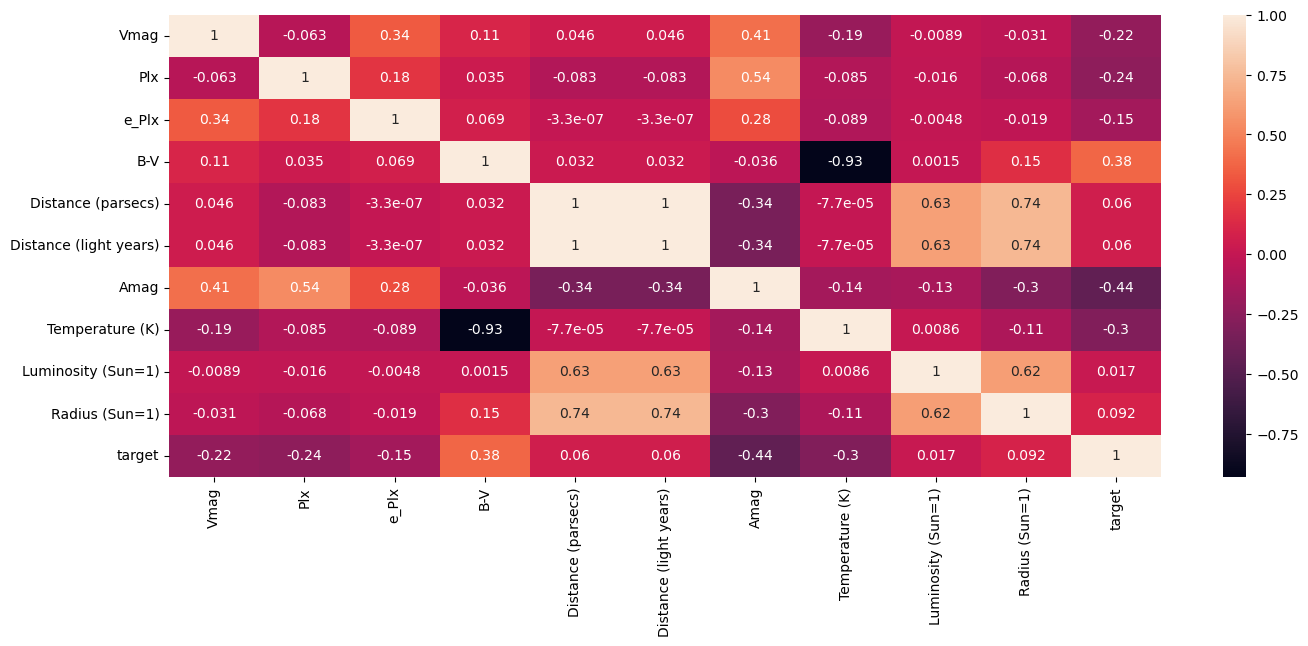

In [13]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numerical_df.corr(), annot=True)